In [32]:
import pandas as pd 
pd.options.display.float_format = '{:.5f}'.format

In [33]:
#pip install --upgrade pykrx

### 1. 데이터 읽기

- data 파일 안에 있는 day1.csv파일 읽기
- 읽은 뒤 df에 저장하기

In [34]:
df=pd.read_csv('./data/day3.csv')

### 2. 전체 컬럼 출력하기 
- 출력한 뒤 5번째 컬럼명만 출력하기
- 이후 컬럼의 갯수를 확인하기

In [35]:
df.columns
df.columns[4]
len(df.columns)

78

### 3. iloc을 활용해 전체행과 3번째 열 출력하기

- 이후 10번째 행에 있는 6번째 열의 값을 출력하기

In [36]:
df.iloc[:,2]
df.iloc[9:,5]

9        2020
10       2021
11       2022
12       2011
13       2012
         ... 
22240    2020
22241    2021
22242    2022
22243    2021
22244    2022
Name: 결산년도, Length: 22236, dtype: int64

### 3-2 loc를 활용해 전체 행과 3번째 열('회계년도') 출력하기
- 이후 10번째 행에 있는 6번째 열('결산년도')의 값 출력하기

In [37]:
#df.loc[:,'회계년도']
#df.loc[9,'결산년도']

### 4. 결측치 확인하기. 모든 열이 가진 결측치 숫자 파악

In [38]:
df.isna().sum()

회사명                     0
거래소코드                   0
회계년도                    0
상장일                     0
상장폐지일               20880
                    ...  
관계기업 등 지분관련 투자자산      227
영업손익                  235
이자보상배율                235
시가총액                 4271
상장주식수                4271
Length: 78, dtype: int64

### 5. '거래소코드' 열의 값들을 출력하기

- 만약 거래소코드의 값이 6자리가 아닌 경우 0으로 채우기 

In [39]:
df['거래소코드'] = df['거래소코드'].apply(lambda x: str(x).zfill(6))
df['거래소코드'] =df['거래소코드'].astype(str).str.zfill(6)

### 6. 거래소코드의 유일값 갯수를 출력하기 
- 이후 유일값을 모두 출력하기
- 출력한 유일값들을 for문을 사용해 출력하기 

In [40]:
df['거래소코드'].nunique()
tr_code=df['거래소코드'].unique()

for i in tr_code:
    print(i)

000020
000040
000050
000070
000080
000100
000120
000140
000150
000180
000210
000220
000230
000240
000250
000270
000300
000320
000360
000390
000420
000430
000440
000480
000490
000500
000520
000590
000640
000650
000660
000670
000680
000700
000720
000760
000800
000830
000850
000860
000880
000890
000910
000950
000970
000990
001000
001020
001040
001060
001070
001120
001130
001140
001210
001230
001250
001260
001300
001310
001340
001360
001380
001390
001420
001430
001440
001460
001470
001520
001530
001540
001550
001560
001570
001620
001630
001680
001740
001770
001780
001790
001800
001810
001820
001840
001940
002000
002020
002030
002070
002100
002140
002150
002170
002200
002210
002220
002230
002240
002250
002270
002290
002300
002310
002320
002350
002360
002380
002390
002410
002420
002450
002460
002530
002600
002620
002670
002680
002690
002700
002710
002720
002760
002780
002790
002800
002810
002820
002840
002870
002880
002900
002920
002960
002990
003000
003010
003030
003060
003070
003080
003090

### 7. df의 회계년도 열을 datetime형식으로 변환하기
- 회계년도의 연도값을 year이라는 새로운 열에 저장하기
- year값이 22년이면서, 영업손익 열이 적자인 회사명 출력

In [41]:
df['회계년도']=pd.to_datetime(df['회계년도'])
df['year']=df['회계년도'].dt.year
df[(df['year'] == 2022) & (df['영업손익'] <0)]

C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\3992698477.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['회계년도']=pd.to_datetime(df['회계년도'])


,회사명,거래소코드,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,...,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,시가총액,상장주식수,year
23,케이알모터스(주),000040,2022-12-01,1976/05/25,NaN,2022,1976,KOSPI,149185246.00000,79137685.00000,...,5475.00000,7403646.00000,587975.00000,48069233.00000,0.00000,-6234393.00000,-0.82000,53837540400.00000,96138465.00000,2022
119,성창기업지주(주),000180,2022-12-01,1976/06/02,NaN,2022,1976,KOSPI,820314255.00000,693764103.00000,...,596097.00000,18453792.00000,4775256.00000,36000000.00000,0.00000,-11487136.00000,-3.49000,129737976000.00000,69751600.00000,2022
136,(주)유유제약,000220,2022-12-01,1975/11/18,NaN,2022,1975,KOSPI,195205073.00000,80607347.00000,...,4600.00000,10366807.00000,1137797.00000,20201681.00000,3610535.00000,-592114.00000,-0.23000,107185223220.00000,17232351.00000,2022
148,일동홀딩스(주),000230,2022-12-01,1975/06/23,NaN,2022,1975,KOSPI,862553167.00000,304867483.00000,...,117727.00000,129783368.00000,97278384.00000,11540400.00000,2997798.00000,-98410983.00000,-5.71000,232539060000.00000,11540400.00000,2022
331,(주)천일고속,000650,2022-12-01,1977/06/23,NaN,2022,1977,KOSPI,54845658.00000,10792477.00000,...,108225.00000,49283.00000,193165.00000,7146100.00000,0.00000,-7411184.00000,-14.38000,86467810000.00000,1429220.00000,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,로스웰인터내셔널유한회사,900260,2022-12-01,2016/06/30,NaN,2022,2016,KOSDAQ,278969546.00000,70410456.00000,...,137552.00000,23139611.00000,13114493.00000,182112751.00000,83677.00000,-6607441.00000,-5.02000,NaN,NaN,2022
22198,오가닉티코스메틱스홀딩스컴퍼니리미티드,900300,2022-12-01,2016/11/04,NaN,2022,2016,KOSDAQ,424690101.00000,42502908.00000,...,0.00000,124113176.00000,0.00000,191307137.00000,31207863.00000,-63858777.00000,-650.64000,NaN,NaN,2022
22236,코오롱티슈진(주),950160,2022-12-01,2017/11/06,NaN,2022,2017,KOSDAQ,109889896.00000,2296899.00000,...,0.00000,41506665.00000,1450027.00000,3237.00000,0.00000,-16303104.00000,-43.92000,NaN,NaN,2022
22242,(주)소마젠,950200,2022-12-01,2020/07/13,NaN,2022,2020,KOSDAQ,49203436.00000,4126818.00000,...,0.00000,3672922.00000,718238.00000,2433856.00000,1635354.00000,-1474652.00000,-6.09000,NaN,NaN,2022


### 8. df의 컬럼중 '영업'이라는 단어를 포함한 열을 df2로 저장하기

- df.columns는 리스트이므로 []로 추출
- 이후 for문, loc나 iloc 사용해 합치기

In [42]:
select_col=df.columns[df.columns.str.contains('영업')]
df2=pd.DataFrame()

for i in select_col:
    df2[i]=df.loc[:,i]

df2

,기타(영업)비용,영업활동으로 인한 현금흐름,영업활동현금흐름,영업손익
0,0.00000,46244032.00000,46244032.00000,25621666.00000
1,0.00000,25226760.00000,25226760.00000,10002904.00000
2,0.00000,8205110.00000,8205110.00000,2062220.00000
3,0.00000,13514668.00000,13514668.00000,7794263.00000
4,0.00000,19833109.00000,19833109.00000,4812974.00000
...,...,...,...,...
22240,0.00000,-4571755.00000,-4571755.00000,-10273354.00000
22241,0.00000,-5145077.00000,-5145077.00000,-7733852.00000
22242,0.00000,-288735.00000,-288735.00000,-1474652.00000
22243,0.00000,-33886577.00000,-33886577.00000,-51905935.00000


### 복습 끝

### 1. 시가총액 데이터 yf로 가져오기

In [43]:
import yfinance as yf

#yf.Ticker('005930.KS').info['marketCap']
#이거 인포를 찍어보면 걍 회사에대한 정보 다 나오고 있는 것 
#이중 시가총액이 있지만, 가장 최근날짜의 시가총액밖에 나오지 않을것임
# TS에서 발행주식의 총수 가져와서 계산은 가능할듯 
# TS에서 발행주식 총수 가져올경우 본주, 우선주 때문에 행처리도 거지같을것임 

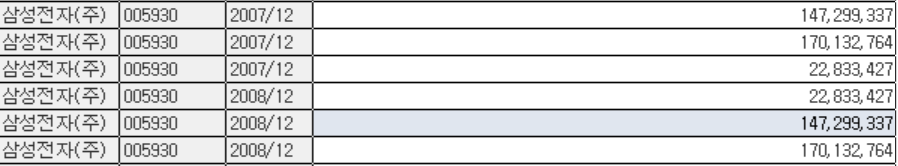

In [44]:
yf.Ticker('005930.KS').history(start='2021-01-02', end='2021-01-06')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00+09:00,76045.04763,79237.06197,75293.98543,77922.70312,38655276,0.00000,0.00000
2021-01-05 00:00:00+09:00,76608.35221,78767.65625,76608.35221,78767.65625,35335669,0.00000,0.00000


In [45]:
yf.Ticker('005930.KS').info['sharesOutstanding']

5969780224

In [46]:
df['거래소코드'][0]+'.KS'

'000020.KS'

In [47]:
import yfinance as yf
from pykrx import stock
stock.get_market_cap('20210501','20210510',"000480")
stock.get_market_cap("20100625")

,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,805000,118575966285000,340230,273895421012,147299337
005490,496500,43288263577500,261246,129723826500,87186835
005380,143500,31609674736500,636013,90460488425,220276479
055550,46900,22239960630300,893851,41633557900,474199587
015760,33350,21396283195200,2385962,79411456500,641567712
...,...,...,...,...,...
017555,189000,192780000,2,378000,1020
033855,13400,152116800,100,1365400,11352
035405,5590,145340000,2,11160,26000


In [48]:
# 이게 걍 goat니까 이거가 나오게 해결하는게?
stock.get_market_cap_by_date('20210501','20210510', "005930")

,시가총액,거래량,거래대금,상장주식수
날짜,,,,
2021-05-03,487731234335000,15710336,1284767138340,5969782550
2021-05-04,493104038630000,12532550,1030147174860,5969782550
2021-05-06,491313103865000,17047511,1397109294200,5969782550
2021-05-07,488925190845000,14154882,1158685043300,5969782550
2021-05-10,496685908160000,19385027,1603729206300,5969782550


### 2. 거래소코드별 데이터 개수 구하기


- 이때, 거래소코드별로 데이터 개수가 5개 미만인 경우만 출력하기 (map사용)

In [49]:
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,...,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,시가총액,상장주식수,year
0,동화약품(주),000020,2011-12-01,1976/03/24,NaN,2011,1976,KOSPI,339431477.00000,188283834.00000,...,207000.00000,32049176.00000,22619738.00000,27931470.00000,7719680.00000,25621666.00000,14.58000,113960397600.00000,27931470.00000,2011
1,동화약품(주),000020,2012-12-01,1976/03/24,NaN,2012,1976,KOSPI,324284672.00000,183871644.00000,...,0.00000,20944790.00000,0.00000,27931470.00000,9025330.00000,10002904.00000,9.47000,168706078800.00000,27931470.00000,2012
2,동화약품(주),000020,2013-12-01,1976/03/24,NaN,2013,1976,KOSPI,316165541.00000,171902299.00000,...,1266209.00000,9238180.00000,17316536.00000,27931470.00000,8862354.00000,2062220.00000,5.37000,122619153300.00000,27931470.00000,2013
3,동화약품(주),000020,2014-12-01,1976/03/24,NaN,2014,1976,KOSPI,313073100.00000,161854137.00000,...,600.00000,5317479.00000,218335.00000,27931470.00000,7587530.00000,7794263.00000,33.65000,155578287900.00000,27931470.00000,2014
4,동화약품(주),000020,2015-12-01,1976/03/24,NaN,2015,1976,KOSPI,317187030.00000,151777299.00000,...,1500.00000,1285905.00000,306173.00000,27931470.00000,8019222.00000,4812974.00000,35.21000,227362165800.00000,27931470.00000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22240,(주)소마젠,950200,2020-12-01,2020/07/13,NaN,2020,2020,KOSDAQ,50605059.00000,3026035.00000,...,101551.00000,1919828.00000,102149.00000,2059205.00000,751267.00000,-10273354.00000,-8.65000,NaN,NaN,2020
22241,(주)소마젠,950200,2021-12-01,2020/07/13,NaN,2021,2020,KOSDAQ,45360183.00000,2738816.00000,...,0.00000,2567206.00000,71753.00000,2076947.00000,1381313.00000,-7733852.00000,-28.38000,NaN,NaN,2021
22242,(주)소마젠,950200,2022-12-01,2020/07/13,NaN,2022,2020,KOSDAQ,49203436.00000,4126818.00000,...,0.00000,3672922.00000,718238.00000,2433856.00000,1635354.00000,-1474652.00000,-6.09000,NaN,NaN,2022
22243,(주)네오이뮨텍,950220,2021-12-01,2021/03/16,NaN,2021,2021,KOSDAQ,187027386.00000,3379067.00000,...,0.00000,4125866.00000,0.00000,2338.00000,0.00000,-51905935.00000,-236.85000,NaN,NaN,2021


In [50]:
16236/12

1353.0

In [51]:
df[df['거래소코드'].map(df['거래소코드'].value_counts()) ==12]

,회사명,거래소코드,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,...,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,시가총액,상장주식수,year
0,동화약품(주),000020,2011-12-01,1976/03/24,NaN,2011,1976,KOSPI,339431477.00000,188283834.00000,...,207000.00000,32049176.00000,22619738.00000,27931470.00000,7719680.00000,25621666.00000,14.58000,113960397600.00000,27931470.00000,2011
1,동화약품(주),000020,2012-12-01,1976/03/24,NaN,2012,1976,KOSPI,324284672.00000,183871644.00000,...,0.00000,20944790.00000,0.00000,27931470.00000,9025330.00000,10002904.00000,9.47000,168706078800.00000,27931470.00000,2012
2,동화약품(주),000020,2013-12-01,1976/03/24,NaN,2013,1976,KOSPI,316165541.00000,171902299.00000,...,1266209.00000,9238180.00000,17316536.00000,27931470.00000,8862354.00000,2062220.00000,5.37000,122619153300.00000,27931470.00000,2013
3,동화약품(주),000020,2014-12-01,1976/03/24,NaN,2014,1976,KOSPI,313073100.00000,161854137.00000,...,600.00000,5317479.00000,218335.00000,27931470.00000,7587530.00000,7794263.00000,33.65000,155578287900.00000,27931470.00000,2014
4,동화약품(주),000020,2015-12-01,1976/03/24,NaN,2015,1976,KOSPI,317187030.00000,151777299.00000,...,1500.00000,1285905.00000,306173.00000,27931470.00000,8019222.00000,4812974.00000,35.21000,227362165800.00000,27931470.00000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22151,엘브이엠씨홀딩스(주),900140,2018-12-01,2010/11/30,NaN,2018,2010,KOSPI,653661541.00000,100446652.00000,...,283454.00000,47340276.00000,11266957.00000,13380724.00000,37193203.00000,-14832360.00000,-0.88000,NaN,NaN,2018
22152,엘브이엠씨홀딩스(주),900140,2019-12-01,2010/11/30,NaN,2019,2010,KOSPI,678847944.00000,97042656.00000,...,1300750.00000,42546297.00000,6778970.00000,14796811.00000,21740945.00000,2966547.00000,0.12000,NaN,NaN,2019
22153,엘브이엠씨홀딩스(주),900140,2020-12-01,2010/11/30,NaN,2020,2010,KOSPI,647658915.00000,75505003.00000,...,2687915.00000,141039039.00000,29139493.00000,22942817.00000,42109656.00000,668517.00000,0.03000,NaN,NaN,2020
22154,엘브이엠씨홀딩스(주),900140,2021-12-01,2010/11/30,NaN,2021,2010,KOSPI,661447272.00000,81280195.00000,...,1478905.00000,143300487.00000,14150526.00000,29476065.00000,34891118.00000,-14568486.00000,-0.86000,NaN,NaN,2021


In [52]:
df['거래소코드'].value_counts()
df[df['거래소코드'].map(df['거래소코드'].value_counts()) >= 5]

,회사명,거래소코드,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,...,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,시가총액,상장주식수,year
0,동화약품(주),000020,2011-12-01,1976/03/24,NaN,2011,1976,KOSPI,339431477.00000,188283834.00000,...,207000.00000,32049176.00000,22619738.00000,27931470.00000,7719680.00000,25621666.00000,14.58000,113960397600.00000,27931470.00000,2011
1,동화약품(주),000020,2012-12-01,1976/03/24,NaN,2012,1976,KOSPI,324284672.00000,183871644.00000,...,0.00000,20944790.00000,0.00000,27931470.00000,9025330.00000,10002904.00000,9.47000,168706078800.00000,27931470.00000,2012
2,동화약품(주),000020,2013-12-01,1976/03/24,NaN,2013,1976,KOSPI,316165541.00000,171902299.00000,...,1266209.00000,9238180.00000,17316536.00000,27931470.00000,8862354.00000,2062220.00000,5.37000,122619153300.00000,27931470.00000,2013
3,동화약품(주),000020,2014-12-01,1976/03/24,NaN,2014,1976,KOSPI,313073100.00000,161854137.00000,...,600.00000,5317479.00000,218335.00000,27931470.00000,7587530.00000,7794263.00000,33.65000,155578287900.00000,27931470.00000,2014
4,동화약품(주),000020,2015-12-01,1976/03/24,NaN,2015,1976,KOSPI,317187030.00000,151777299.00000,...,1500.00000,1285905.00000,306173.00000,27931470.00000,8019222.00000,4812974.00000,35.21000,227362165800.00000,27931470.00000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22232,코오롱티슈진(주),950160,2018-12-01,2017/11/06,NaN,2018,2017,KOSDAQ,164621431.00000,1048658.00000,...,0.00000,5075100.00000,31838041.00000,2680.00000,0.00000,-32940569.00000,-31.45000,NaN,NaN,2018
22233,코오롱티슈진(주),950160,2019-12-01,2017/11/06,NaN,2019,2017,KOSDAQ,124536732.00000,2921245.00000,...,118798.00000,2363845.00000,76632604.00000,2778.00000,0.00000,-44518987.00000,-37.79000,NaN,NaN,2019
22234,코오롱티슈진(주),950160,2020-12-01,2017/11/06,NaN,2020,2017,KOSDAQ,72724786.00000,2582872.00000,...,0.00000,41990907.00000,60698514.00000,2606.00000,0.00000,-41556307.00000,-49.75000,NaN,NaN,2020
22235,코오롱티슈진(주),950160,2021-12-01,2017/11/06,NaN,2021,2017,KOSDAQ,61399475.00000,2732949.00000,...,254.00000,7627094.00000,41045753.00000,2929.00000,0.00000,-46902949.00000,-100.55000,NaN,NaN,2021


### 3. pbr 구하기
- '자산,자본,부채,매출.csv'를 새로운 df로 파일 읽기
- 시가총액/자산

In [53]:
df=pd.read_csv('./data/자산,자본,부채,매출.csv',encoding='cp949')

In [54]:
df

,회사명,거래소코드,회계년도,자산(*)(IFRS연결)(천원),자본(*)(IFRS연결)(천원),부채(*)(IFRS연결)(천원),매출액(수익)(*)(IFRS연결)(천원),자산(*)(IFRS)(천원),자본(*)(IFRS)(천원),부채(*)(IFRS)(천원),매출액(수익)(*)(IFRS)(천원)
0,(주)CMG제약,58820,2018/12,114379880.00000,103981846.00000,10398033.00000,49864782.00000,114379880.00000,103981846.00000,10398033.00000,49864782.00000
1,(주)CMG제약,58820,2019/12,192243166.00000,180158283.00000,12084883.00000,58622681.00000,192243166.00000,180158283.00000,12084883.00000,58622681.00000
2,(주)CMG제약,58820,2020/12,NaN,NaN,NaN,NaN,195355583.00000,181131004.00000,14224578.00000,64459891.00000
3,(주)CMG제약,58820,2021/12,NaN,NaN,NaN,NaN,199174593.00000,184702494.00000,14472099.00000,69475496.00000
4,(주)CMG제약,58820,2022/12,NaN,NaN,NaN,NaN,213260376.00000,184953015.00000,28307361.00000,82197410.00000
...,...,...,...,...,...,...,...,...,...,...,...
13228,흥아해운(주),3280,2019/12,430962722.00000,30919383.00000,400043339.00000,102166838.00000,386550839.00000,17632229.00000,368918610.00000,97376909.00000
13229,흥아해운(주),3280,2020/12,286775958.00000,-26283865.00000,313059823.00000,88938838.00000,284767347.00000,-20161176.00000,304928523.00000,85455349.00000
13230,흥아해운(주),3280,2021/12,247298683.00000,102939788.00000,144358895.00000,81724314.00000,247989912.00000,108146996.00000,139842916.00000,81724314.00000
13231,흥아해운(주),3280,2022/12,317059937.00000,135304736.00000,181755200.00000,177860078.00000,292999868.00000,128025089.00000,164974779.00000,146029641.00000


#### 개별, 연결 합치기

- 연결이 붙은 열을 추출해 개별 df로 만들기 (filtered_df)
- 기존의 df에서 연결이 붙은 열을 드랍하기
- 두 데이터프레임의 열 이름을 깔끔하게 정리하기 (for문 사용, 제거할 내용을 리스트화하기)
- 기존 df와 filtered_df를 합치기. 이 때, filtered_df가 연결값이므로 우선시 되어야함

In [55]:
filtered_df = df.filter(regex='연결')
filtered_df[['회사명','거래소코드','회계년도']] =df[['회사명','거래소코드','회계년도']]

#연결 이름이 붙은 열 제거하기 
df=df.drop(df.filter(regex='연결').columns,axis=1)

C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\1489094051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['회사명','거래소코드','회계년도']] =df[['회사명','거래소코드','회계년도']]
C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\1489094051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['회사명','거래소코드','회계년도']] =df[['회사명','거래소코드','회계년도']]
C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\1489094051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [56]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산(*)(IFRS)(천원)', '자본(*)(IFRS)(천원)',
       '부채(*)(IFRS)(천원)', '매출액(수익)(*)(IFRS)(천원)'],
      dtype='object')

In [57]:
strs = ['(*)', '(IFRS연결)', '(천원)', '(IFRS)', '[제조]',
         '*','(-)',('결손금'),'(수익)','(보고서기재)','()','(정상)']

#위에 포함된 모든 문자열을 삭제시키기
for s in strs:
    filtered_df.columns = filtered_df.columns.str.replace(s, '')
    df.columns = df.columns.str.replace(s, '')

## 공백제거하기
filtered_df.columns = filtered_df.columns.str.strip()
filtered_df.columns

df.columns = df.columns.str.strip()
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산', '자본', '부채', '매출액'], dtype='object')

In [58]:
#df의 값이 우선사용되고 값이 없을경우에 df2값이 사용됨 
#df=df.combine_first(df2)
df=filtered_df.combine_first(df)

In [59]:
df

,거래소코드,매출액,부채,자본,자산,회계년도,회사명
0,58820,49864782.00000,10398033.00000,103981846.00000,114379880.00000,2018/12,(주)CMG제약
1,58820,58622681.00000,12084883.00000,180158283.00000,192243166.00000,2019/12,(주)CMG제약
2,58820,64459891.00000,14224578.00000,181131004.00000,195355583.00000,2020/12,(주)CMG제약
3,58820,69475496.00000,14472099.00000,184702494.00000,199174593.00000,2021/12,(주)CMG제약
4,58820,82197410.00000,28307361.00000,184953015.00000,213260376.00000,2022/12,(주)CMG제약
...,...,...,...,...,...,...,...
13228,3280,102166838.00000,400043339.00000,30919383.00000,430962722.00000,2019/12,흥아해운(주)
13229,3280,88938838.00000,313059823.00000,-26283865.00000,286775958.00000,2020/12,흥아해운(주)
13230,3280,81724314.00000,144358895.00000,102939788.00000,247298683.00000,2021/12,흥아해운(주)
13231,3280,177860078.00000,181755200.00000,135304736.00000,317059937.00000,2022/12,흥아해운(주)


#### 시가총액 구하기 
- df의 거래소코드에 제로패딩하기 
- '회계년도 말일'열을 생성하기 (이때 df회계년도의 값에서 일 데이터만 31로 바뀐 값 넣기)
- df.head()를 df_example로 저장하기

In [60]:
df['거래소코드'] = df['거래소코드'].astype(str).str.zfill(6)

df['회계년도'] = pd.to_datetime(df['회계년도'])
df['회계년도말일'] = df['회계년도'].dt.strftime('%Y-%m-31')
df_example=df.head()

C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\3142858409.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['회계년도'] = pd.to_datetime(df['회계년도'])


In [61]:
df_example

,거래소코드,매출액,부채,자본,자산,회계년도,회사명,회계년도말일
0,058820,49864782.00000,10398033.00000,103981846.00000,114379880.00000,2018-12-01,(주)CMG제약,2018-12-31
1,058820,58622681.00000,12084883.00000,180158283.00000,192243166.00000,2019-12-01,(주)CMG제약,2019-12-31
2,058820,64459891.00000,14224578.00000,181131004.00000,195355583.00000,2020-12-01,(주)CMG제약,2020-12-31
3,058820,69475496.00000,14472099.00000,184702494.00000,199174593.00000,2021-12-01,(주)CMG제약,2021-12-31
4,058820,82197410.00000,28307361.00000,184953015.00000,213260376.00000,2022-12-01,(주)CMG제약,2022-12-31


In [62]:
stock.get_market_cap_by_date('2021-01-01','2021-01-05', "005930")

,시가총액,거래량,거래대금,상장주식수
날짜,,,,
2021-01-04,495491951650000,38655276,3185356823460,5969782550
2021-01-05,500864755945000,35335669,2915618322800,5969782550


### 만들어낸 회계년도 말일을 통해 df_example의 연말 시가총액 구하기

- 저장할 빈 리스트를 우선 만들어야 할것
- 시가총액 코드를 보면서 내가 구한 걸 넣어야함. 
- 이때, 최종값 1개만 넣으면 되므로 특정함수를 사용해야할것임 

In [63]:
marcap=[]
#stock.get_market_cap_by_date('2021-01-01','2021-01-05', "005930")
for i in range(len(df_example)):
    marcap.append(stock.get_market_cap_by_date(df_example['회계년도'][i],
                         df_example['회계년도말일'][i],
                         df_example['거래소코드'][i]).tail(1)['시가총액'][0])

C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\1734034704.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marcap.append(stock.get_market_cap_by_date(df_example['회계년도'][i],
C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\1734034704.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marcap.append(stock.get_market_cap_by_date(df_example['회계년도'][i],
C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\1734034704.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value 

In [64]:
df_example['시가총액']=marcap
df_example

C:\Users\djssu\AppData\Local\Temp\ipykernel_20372\651738567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['시가총액']=marcap


,거래소코드,매출액,부채,자본,자산,회계년도,회사명,회계년도말일,시가총액
0,058820,49864782.00000,10398033.00000,103981846.00000,114379880.00000,2018-12-01,(주)CMG제약,2018-12-31,461137478340
1,058820,58622681.00000,12084883.00000,180158283.00000,192243166.00000,2019-12-01,(주)CMG제약,2019-12-31,590292037000
2,058820,64459891.00000,14224578.00000,181131004.00000,195355583.00000,2020-12-01,(주)CMG제약,2020-12-31,802797170320
3,058820,69475496.00000,14472099.00000,184702494.00000,199174593.00000,2021-12-01,(주)CMG제약,2021-12-31,532651755740
4,058820,82197410.00000,28307361.00000,184953015.00000,213260376.00000,2022-12-01,(주)CMG제약,2022-12-31,298618324600
